<a href="https://colab.research.google.com/github/slisovych/machine_learning_hometasks/blob/main/HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
medical_df = pd.read_csv('drive/MyDrive/Colab Notebooks/ML_Hanna_Pylieva/data/medical-charges_1.csv')

In [4]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Розрахувати коефіцієнт кореляції (наприклад, Пірсона) між charges і числовими змінними (age, bmi, children) для оцінки сили їхнього зв'язку.
Візуалізувати зв'язки за допомогою scatter plot.

2. Поділити дані на групи за категоріальними змінними (sex, smoker, region) і обчислити середні/медіанні значення charges у кожній групі.
Перевірити, чи існують суттєві відмінності у charges між різними групами (наприклад, курці проти некурців, регіони тощо).

3. Створити нові групи або категорії на основі поєднання факторів. Наприклад:
Курці з різним рівнем bmi.
Групи віку (наприклад, 18-25, 26-35, ...).
Оцінити середні значення charges у кожній комбінації для виявлення взаємозалежностей.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [5]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [6]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['red', 'grey'],
                   title='Annual Medical Charges vs Sex')
fig.update_layout(bargap=0.1)
fig.show()

Більшість даних зосереджені в нижньому діапазоні витрат (0–10 тисяч), незалежно від статі.

У чоловіків як і у жінок більшість витрат розташовані в нижньому діапазоні (до 10 тисяч), але чоловіки мають трохи більше високих витрат, ніж жінки.



In [7]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green', 'grey', 'blue', 'orange'],
                   title='Annual Medical Charges vs Region')
fig.update_layout(bargap=0.1)
fig.show()

У всіх регіонах більшість витрат зосереджені в діапазоні 10 тисяч.

Регіон має значний вплив на розподіл медичних витрат. Зокрема, southeast виділяється високими витратами та значною кількістю викидів. Ці регіональні відмінності можуть бути пов'язані з демографічними, екологічними чи іншими локальними факторами, які варто проаналізувати детальніше.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [8]:
medical_df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [9]:
px.histogram(medical_df,
                   x='region',
                   color='smoker',
                   color_discrete_sequence=['blue', 'orange'],
                   title='Smoker vs Region')

Регіон Southeast має найбільшу загальну кількість спостережень як серед курців, так і серед некурців.

Пропорція курців до некурців залишається схожою у всіх регіонах.

Це свідчить про домінування некурців у кожному регіоні, хоча їх кількість варіюється залежно від регіону.

In [10]:
medical_df.children.value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [11]:
fig = px.histogram(medical_df,
                   x='children',
                   color='smoker',
                   #color_discrete_sequence=['blue', 'orange'],
                   title='Smoker vs Children')
fig.update_layout(bargap=0.1)
fig.show()

Більшість людей, незалежно від кількості дітей, не курять.

Найбільша кількість як курців, так і некурців припадає на людей без дітей.

У міру збільшення кількості дітей, загальна кількість як курців, так і некурців зменшується.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [17]:
px.violin(medical_df,
          x='children',
          y='charges',
          title='Charges vs Children')

Для всіх категорій (0–5 дітей) більшість витрат на медичні послуги зосереджені в нижньому діапазоні (приблизно до 10,000)

Витрати на медичні послуги в основному не залежать від кількості дітей, оскільки розподіл витрат є схожим між групами.

У категоріях з меншою кількістю дітей більша варіативність витрат і частіші екстремальні значення.

У сім’ях з великою кількістю дітей (4, 5) спостерігається більш стабільний рівень витрат, але кількість таких випадків значно менша.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [18]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [19]:
def estimate_charges(age, w, b):
    return w * age + b

In [20]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

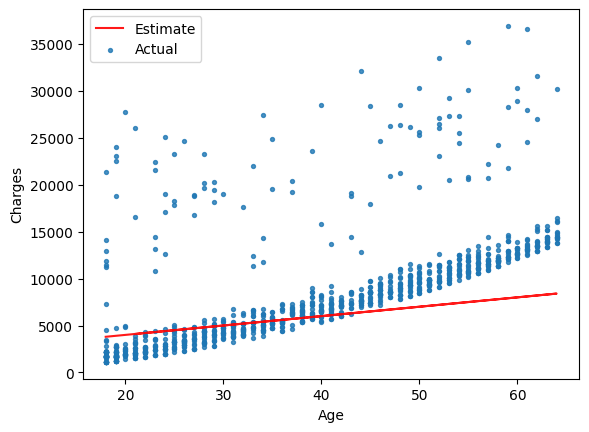

In [45]:
try_parameters(non_smoker_df, 100, 2000)

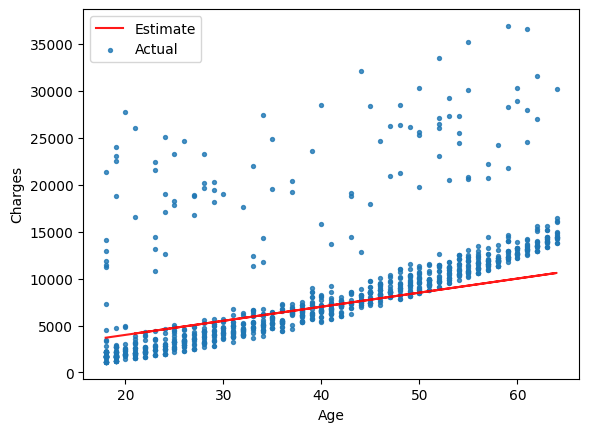

In [43]:
try_parameters(non_smoker_df, 150, 1000)

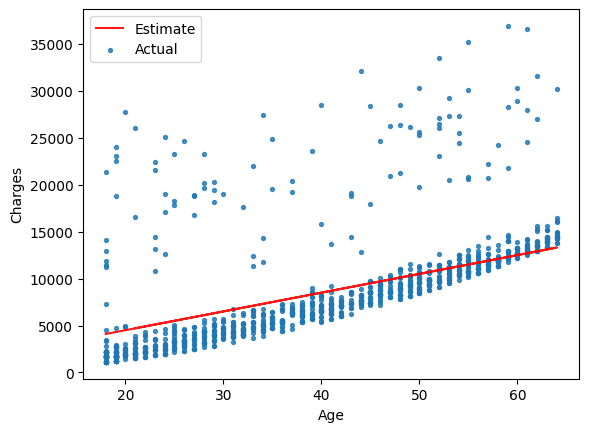

In [47]:
try_parameters(non_smoker_df, 200, 500)

При збільшенні w (нахилу лінії) лінія краще описує зростання витрат із віком для старших груп, але починає переоцінювати витрати для молодших. Зменшення b (перетину з віссю y) наближає лінію до початкових точок, але знижує її точність для старших вікових груп.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [55]:
import numpy as np

In [49]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [57]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    targets = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

In [62]:
try_parameters (100, 2000)
try_parameters(150, 1000)
try_parameters(200, 500)

RMSE Loss:  5788.826330628788
RMSE Loss:  5176.2124205022
RMSE Loss:  4757.980240770584


Останнє значення параметрів w i b мають найнижче значення RMSE (4757.98), але і залишається поганим результатом відносно середнього значення та стандартного відхилення таргету charges (13270 nf 12110).

Збільшення w та зменшення b наближають лінію до початкових точок.